In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
import seaborn as sns

data = data = pd.read_csv("../Dataset/Data_COVID19_Engl_sh_processed.csv")


#### (H0): There is no significant relationship between individuals' perception of the consequences of COVID-19 on personal security (dan) and their perception of the adequacy of state protection of individual and community security during the COVID-19 pandemic (gov).

#### (H1): There is a significant relationship between individuals' perception of the consequences of COVID-19 on personal security (dan) and their perception of the adequacy of state protection of individual and community security during the COVID-19 pandemic (gov).

Since both "dan" and "gov" are ordinal variables, we can use Spearman's rank correlation coefficient to assess the strength and direction of the relationship between these two variables. Spearman's correlation does not assume linearity and is appropriate for ordinal data.

In [2]:
# Spearman's Rank-Order Correlation Test
spearman_corr, spearman_pval = spearmanr(
    data['dan_n'], data['gov_n'])
print("Spearman's Rank-Order Correlation Test:")
print(f"Correlation Coefficient: {spearman_corr}")
print(f"P-value: {spearman_pval}")

# Kendall's Tau Test
kendall_tau, kendall_pval = kendalltau(data['dan_n'], data['gov_n'])
print("\nKendall's Tau Test:")
print(f"Tau Coefficient: {kendall_tau}")
print(f"P-value: {kendall_pval}")


Spearman's Rank-Order Correlation Test:
Correlation Coefficient: -0.15752143173986638
P-value: 2.606629198944219e-17

Kendall's Tau Test:
Tau Coefficient: -0.13367645571812428
P-value: 1.8053923840367645e-17


Chi-square statistic: 162.60463823191884
p-value: 2.4986601463936063e-26
Degrees of freedom: 16
Expected frequencies table:
[[ 86.49141255 250.05783386 245.52400981 247.26778829 165.65895549]
 [102.31195233 295.79705573 290.4339292  292.49667017 195.96039257]
 [ 38.85594111 112.33753943 110.30073607 111.08412198  74.42166141]
 [ 17.4721346   50.51419558  49.59831756  49.95057834  33.46477392]
 [  2.86855941   8.29337539   8.14300736   8.20084122   5.49421661]]


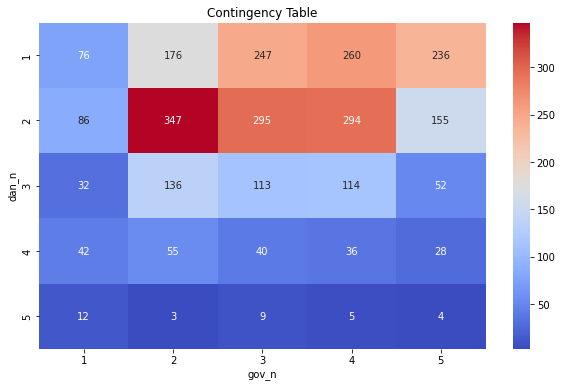

In [3]:
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = pd.crosstab(data['dan_n'], data['gov_n'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title("Contingency Table")
plt.show()


#### In our case, the p-value is very small (2.4986601463936063e-26), suggesting that there is a significant association between the variables. 

#### The values in the heat map are not uniform across the cell, even some place is much higher or lower than the others. This suggests that there is a non-random association between the variables.

### We change our hypothesis to 
#### H(0): There is no significant difference in the mean perception scores of the consequences of COVID-19 on personal security (dan) among individuals with different perceptions of the adequacy of state protection of individual and community security during the COVID-19 pandemic (gov).

#### H(1): There is a significant difference in the mean perception scores of the consequences of COVID-19 on personal security (dan) among individuals with different perceptions of the adequacy of state protection of individual and community security during the COVID-19 pandemic (gov).


In [4]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

grouped_data = data.groupby('gov_n')['dan_n']

# Calculating mean perception scores for each group
group_means = grouped_data.mean()

# Performing ANOVA test
f_statistic, p_value = f_oneway(
    *[grouped_data.get_group(group) for group in grouped_data.groups])

# Printing ANOVA results
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Performing post-hoc Tukey HSD test if ANOVA is significant
if p_value < 0.05:
    posthoc = pairwise_tukeyhsd(data['dan_n'], data['gov_n'], alpha=0.05)
    print("\nPost-hoc Tukey HSD Test Results:")
    print(posthoc)
else:
    print("\nNo significant differences found.")


ANOVA Test Results:
F-statistic: 18.827939730472224
P-value: 2.722236623909921e-15

Post-hoc Tukey HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.1963 0.0349 -0.3838 -0.0088   True
     1      3  -0.3448    0.0 -0.5328 -0.1568   True
     1      4  -0.3897    0.0 -0.5775 -0.2019   True
     1      5  -0.5507    0.0 -0.7501 -0.3512   True
     2      3  -0.1485 0.0227 -0.2836 -0.0135   True
     2      4  -0.1934 0.0009 -0.3282 -0.0586   True
     2      5  -0.3544    0.0  -0.505 -0.2038   True
     3      4  -0.0449 0.8954 -0.1803  0.0906  False
     3      5  -0.2059 0.0019  -0.357 -0.0547   True
     4      5   -0.161 0.0298 -0.3119 -0.0101   True
----------------------------------------------------


#### Based on the ANOVA test results, we have found a significant difference in the mean perception scores of the consequences of COVID-19 on personal security (dan) among individuals with different perceptions of the adequacy of state protection during the COVID-19 pandemic (gov).

##### The post-hoc Tukey HSD test results provide further insights into the specific differences between groups:

##### Groups 1, 2, 3, 4, and 5 all have significantly different mean perception scores compared to each other.
##### Group 3 does not have a significant mean difference compared to Group 4.

##### All other pairwise comparisons between groups show significant differences in mean perception scores.
##### Therefore, we can conclude that there are significant differences in how individuals perceive the consequences of COVID-19 on personal security based on their perceptions of the adequacy of state protection during the pandemic.